<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,94.758606,55.870779,-0.010473,160.618913,160.622104,-0.003192
1,0.0,1.0,33.829755,87.582591,-0.061135,131.351212,131.393512,-0.042300
2,0.0,2.0,32.685058,23.082044,0.064989,65.832091,65.791152,0.040939
3,0.0,3.0,81.956361,25.637889,-0.032953,117.561297,117.608971,-0.047674
4,0.0,4.0,25.603669,90.352999,-0.037615,125.919054,125.937275,-0.018221
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,56.745153,98.587872,-0.116481,165.216544,165.273888,-0.057343
19996,999.0,16.0,66.088152,98.607119,0.009230,174.704500,174.629052,0.075448
19997,999.0,17.0,72.000153,82.966215,-0.046895,164.919473,164.909534,0.009939
19998,999.0,18.0,61.488781,47.347843,-0.238021,118.598603,118.819285,-0.220682


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,94.758606,55.870779,-0.010473,160.618913,160.622104,-0.003192
1,0.0,1.0,33.829755,87.582591,-0.061135,131.351212,131.393512,-0.042300
2,0.0,2.0,32.685058,23.082044,0.064989,65.832091,65.791152,0.040939
3,0.0,3.0,81.956361,25.637889,-0.032953,117.561297,117.608971,-0.047674
4,0.0,4.0,25.603669,90.352999,-0.037615,125.919054,125.937275,-0.018221
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,56.745153,98.587872,-0.116481,165.216544,165.273888,-0.057343
19996,999.0,16.0,66.088152,98.607119,0.009230,174.704500,174.629052,0.075448
19997,999.0,17.0,72.000153,82.966215,-0.046895,164.919473,164.909534,0.009939
19998,999.0,18.0,61.488781,47.347843,-0.238021,118.598603,118.819285,-0.220682


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,94.758606,55.870779,-0.010473,160.618913,160.622104,-0.003192
1,0.0,1.0,33.829755,87.582591,-0.061135,131.351212,131.393512,-0.042300
2,0.0,2.0,32.685058,23.082044,0.064989,65.832091,65.791152,0.040939
3,0.0,3.0,81.956361,25.637889,-0.032953,117.561297,117.608971,-0.047674
4,0.0,4.0,25.603669,90.352999,-0.037615,125.919054,125.937275,-0.018221
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,56.745153,98.587872,-0.116481,165.216544,165.273888,-0.057343
19996,999.0,16.0,66.088152,98.607119,0.009230,174.704500,174.629052,0.075448
19997,999.0,17.0,72.000153,82.966215,-0.046895,164.919473,164.909534,0.009939
19998,999.0,18.0,61.488781,47.347843,-0.238021,118.598603,118.819285,-0.220682


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    94.758606  55.870779 -0.010473  160.618913  160.622104 -0.003192
      1.0    33.829755  87.582591 -0.061135  131.351212  131.393512 -0.042300
      2.0    32.685058  23.082044  0.064989   65.832091   65.791152  0.040939
      3.0    81.956361  25.637889 -0.032953  117.561297  117.608971 -0.047674
      4.0    25.603669  90.352999 -0.037615  125.919054  125.937275 -0.018221
...                ...        ...       ...         ...         ...       ...
999.0 15.0   56.745153  98.587872 -0.116481  165.216544  165.273888 -0.057343
      16.0   66.088152  98.607119  0.009230  174.704500  174.629052  0.075448
      17.0   72.000153  82.966215 -0.046895  164.919473  164.909534  0.009939
      18.0   61.488781  47.347843 -0.238021  118.598603  118.819285 -0.220682
      19.0   88.190521  70.412279 -0.096563  168.506237  168.544844 -0.038607

[20000 rows x 6 columns]

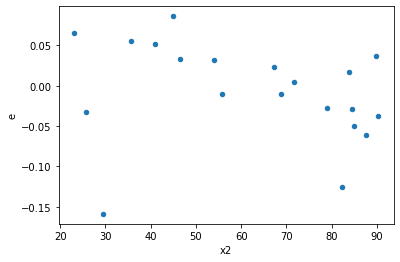

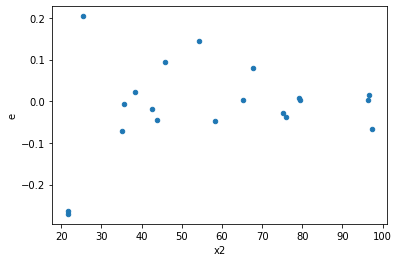

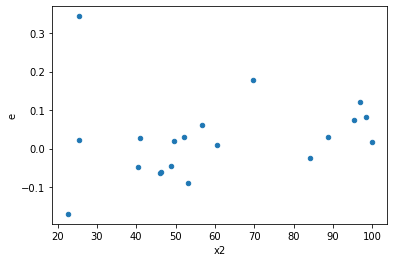

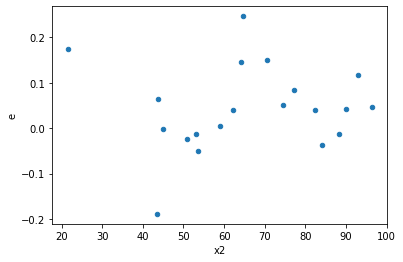

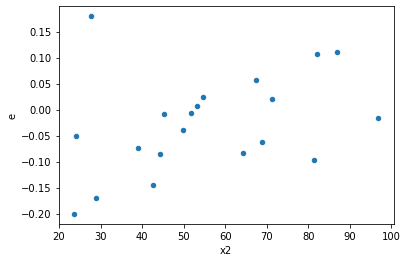

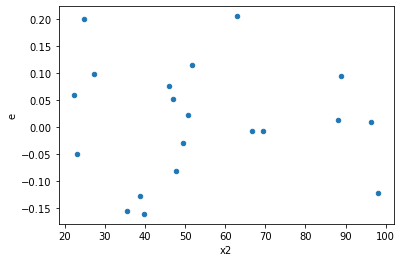

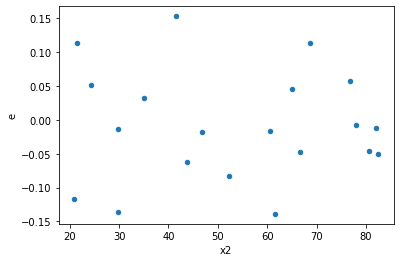

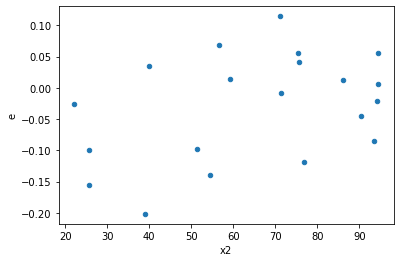

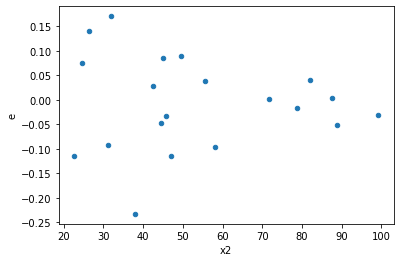

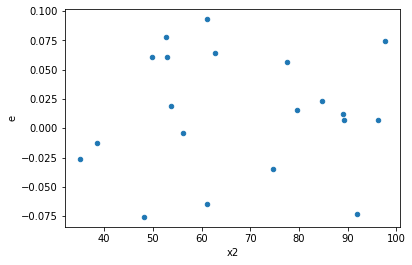

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,6.0,6.0,0.0034048730231076843,0.04267430280118879,0.000567478837184614,0.0071123838001981325,12.533302273410259,0.007201067009987128,0.9963994664950064,0.003600533504993564,Reject001=0 : Heteroscedasticity
9.0,6.0,6.0,0.0025220501116425733,0.011033549882419152,0.00042034168527376223,0.001838924980403192,4.374833724153548,0.0955339701901865,0.9522330149049067,0.04776698509509325,Reject001=1 : Homoscedasticity
16.0,6.0,6.0,0.026993614813684307,0.0319799773401826,0.0044989358022807175,0.005329996223363766,1.1847237786015408,0.8422181040334218,0.5788909479832891,0.4211090520167109,Reject001=1 : Homoscedasticity
24.0,6.0,6.0,0.037192054603747124,0.05612940617768694,0.006198675767291187,0.00935490102961449,1.509177343809123,0.6298300485818213,0.6850849757090893,0.3149150242909107,Reject001=1 : Homoscedasticity
26.0,6.0,6.0,0.04620861811162941,0.05014919844149528,0.0077014363519382345,0.008358199740249213,1.0852780388356633,0.9234067913449509,0.5382966043275246,0.4617033956724754,Reject001=1 : Homoscedasticity
36.0,6.0,6.0,0.018359204177339838,0.02404758211911751,0.003059867362889973,0.004007930353186252,1.3098379367009083,0.75149119567233,0.624254402163835,0.375745597836165,Reject001=1 : Homoscedasticity
40.0,6.0,6.0,0.013191202746080724,0.11448078644573897,0.002198533791013454,0.019080131074289828,8.678570760331365,0.018782006292023423,0.9906089968539883,0.009391003146011712,Reject001=1 : Homoscedasticity
46.0,6.0,6.0,0.0311479815998567,0.03594205355490805,0.0051913302666427835,0.005990342259151342,1.1539127644493474,0.8664729755939811,0.5667635122030095,0.43323648779699053,Reject001=1 : Homoscedasticity
50.0,6.0,6.0,0.0554185801665515,0.07752400226015839,0.009236430027758582,0.012920667043359731,1.3988810616795424,0.6939277913497426,0.6530361043251287,0.3469638956748713,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.039345877439926645,0.016058266610630752,0.006557646239987774,0.002676377768438459,0.408130855263008,0.2997989867877051,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.09833195403870958,0.01478987283777566,0.016388659006451596,0.0024649788062959433,0.15040759621184224,0.03639017929568718,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.0622229021175245,0.03970886795151027,0.010370483686254083,0.006618144658585044,0.638171261708583,0.5991341072725525,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.03702395443209747,0.026351026618546432,0.006170659072016245,0.0043918377697577385,0.7117291230161445,0.6901524628245751,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.0034048730231076843,0.04267430280118879,0.000567478837184614,0.0071123838001981325,12.533302273410259,0.007201067009987128,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,0.0719799113645267,0.04255101302189547,0.011996651894087782,0.007091835503649245,0.5911512283810002,0.5390020529293906,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.05604587428837748,0.04179393055076835,0.009340979048062912,0.006965655091794725,0.7457093154747231,0.7307149922120029,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.05004603224416014,0.03470271874827459,0.00834100537402669,0.0057837864580457645,0.6934159850868905,0.6678858907314981,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.10288948012275706,0.013927655979443367,0.017148246687126178,0.0023212759965738944,0.13536520898760818,0.028122901850626075,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      951
Reject001=0 : Heteroscedasticity     49
Name: Result_test, dtype: int64